In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Seperate Black and White Pixels

*IPython* is a Jupyter notebook module. From **IPython.diplay** module import the Image class.

In [2]:
from IPython.display import Image

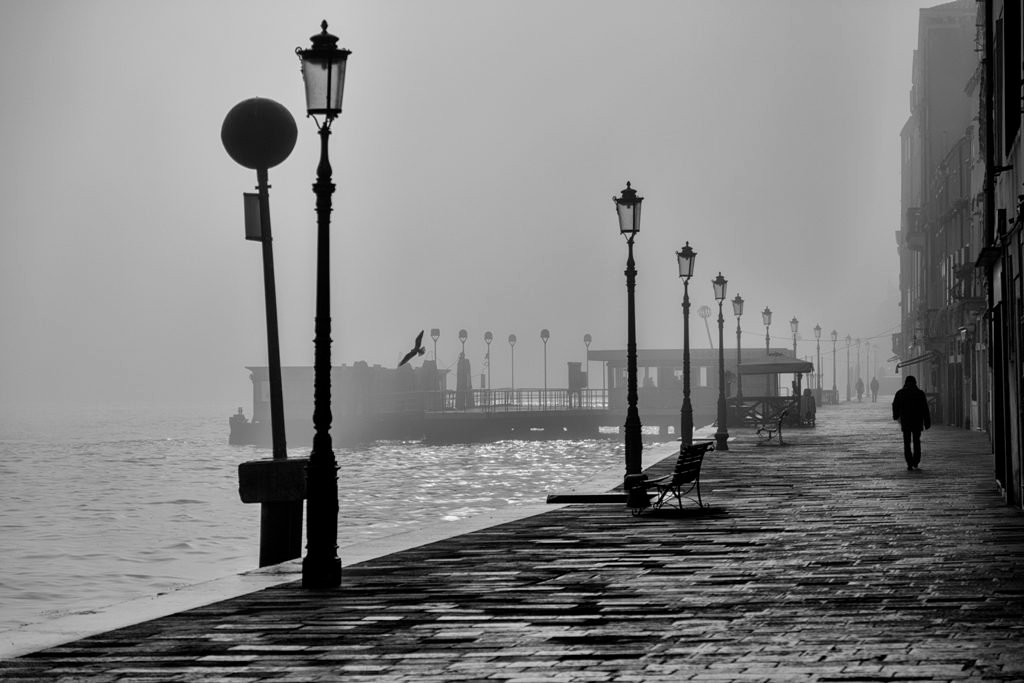

In [13]:
Image(filename=r"C:\Users\Ashima\Downloads\bw_street.jpg")

In [16]:
def split_black_white(image):
    # Threshold for separating black and white
    threshold = 127
    
    # Create masks for black and white
    black_mask = image <= threshold
    white_mask = image > threshold
    
    # initialize a black and white image as a numpy array initialized to 0
    # 0 is black
    black_image = np.zeros_like(image)
    white_image = np.zeros_like(image)
    
    # Assign pixel values based on masks
    black_image[black_mask] = image[black_mask]
    white_image[white_mask] = image[white_mask]
    
    return black_image, white_image

**np.zeros vs np.zeros_like** : np.zeros initializes to a given shape and data type while np.zeros_like initializes to the given shape and data type

**Boolean Masking**

black_image[black_mask] = image[black_mask]

    Objective: To set the pixel values of black_image at positions where the black_mask is True, using corresponding pixel values from the image.

black_image[black_mask]: This selects all the positions in black_image where black_mask is True.
image[black_mask]: This selects all the pixel values from the original image at the positions where black_mask is True.

In [17]:
image_path = r"C:\Users\Ashima\Downloads\bw_street.jpg"
#cv2.imread() reads a file and returns a numpy array
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#cv2.IMREAD_GRAYSCALE: read image in greyscale mode i.e. image is converted to greayscale

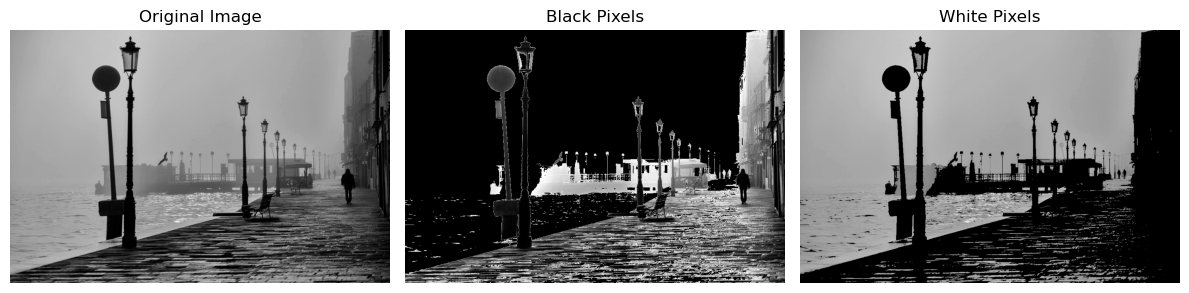

In [19]:
if image is None:
    print(f"Failed to load image from {image_path}")
else:
    black_part, white_part = split_black_white(image)
    
    plt.figure(figsize=(12, 6)) #width, height
    
    plt.subplot(1, 3, 1) #plt.subplot(nrows, ncols, index) ; The index of the current subplot you want to create or activate.
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(black_part, cmap='gray')
    plt.title('Black Pixels')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(white_part, cmap='gray')
    plt.title('White Pixels')
    plt.axis('off')
    
    plt.tight_layout() #automatically adjusts the spacing between subplots to prevent overlaps
    plt.show()

# SECOND EXAMPLE

In [23]:
image_path = r"C:\Users\Ashima\Downloads\bw_bubble.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

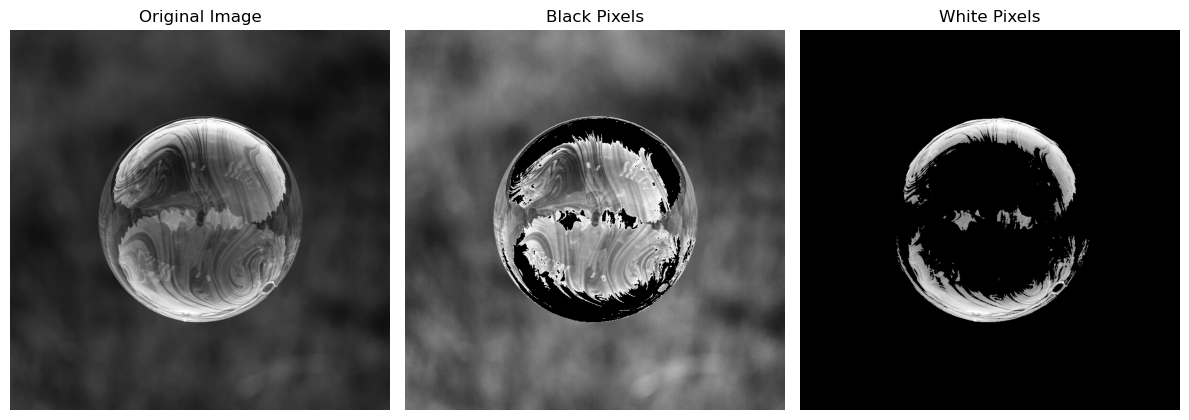

In [24]:
if image is None:
    print(f"Failed to load image from {image_path}")
else:
    black_part, white_part = split_black_white(image)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(black_part, cmap='gray')
    plt.title('Black Pixels')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(white_part, cmap='gray')
    plt.title('White Pixels')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

## Split RGB Arrays

In [3]:
def rgb_split(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_COLOR) #cv2.IMREAD_COLOR: read color with 3 channels even if it is a greyscale image
    
    if image is None:
        print(f"Failed to load image from {image_path}")
    else:
        b, g, r= cv2.split(image) # when u split, a single channel is in grayscale, need to mix with the color for display
    
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(1, 4, 2)
        plt.imshow(r, cmap='Reds')
        plt.title('R Channel')
        plt.axis('off')
        
        plt.subplot(1, 4, 3)
        plt.imshow(g, cmap='Greens')
        plt.title('G Channel')
        plt.axis('off')
        
        plt.subplot(1, 4, 4)
        plt.imshow(b, cmap='Blues')
        plt.title('B Channel')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

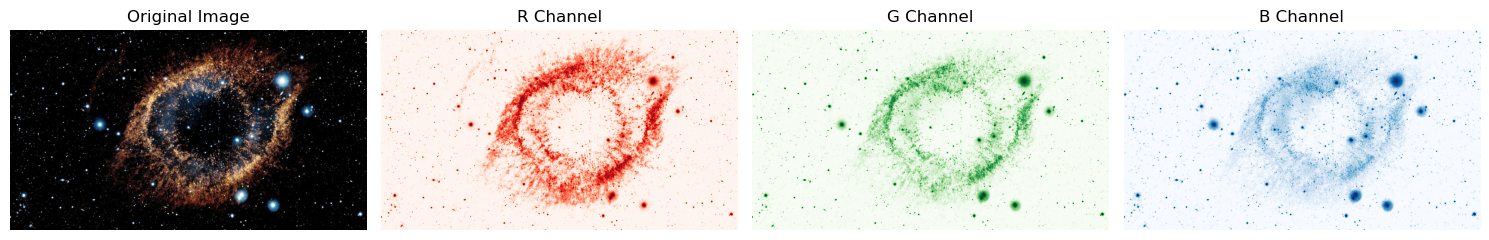

In [4]:
image_path = r"C:\Users\Ashima\Downloads\nasa_wallpaper.jpg"
rgb_split(image_path)

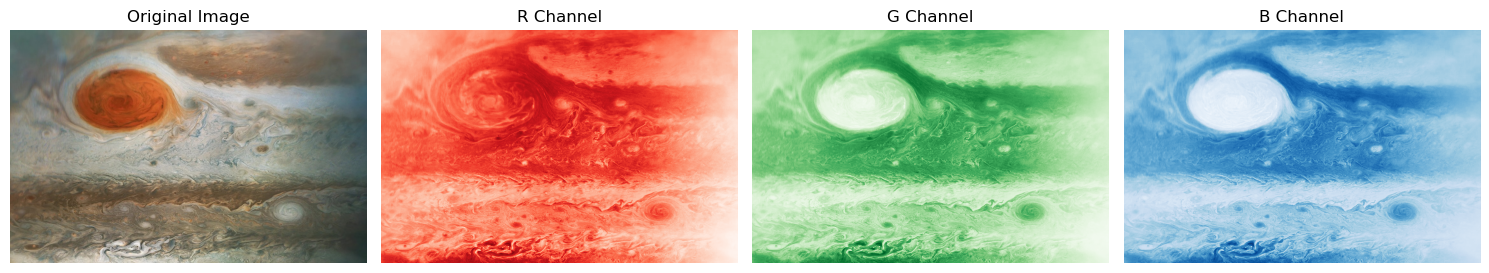

In [5]:
jup_image_path = r"C:\Users\Ashima\Downloads\jupiter_red_spot.jpg"
rgb_split(jup_image_path)

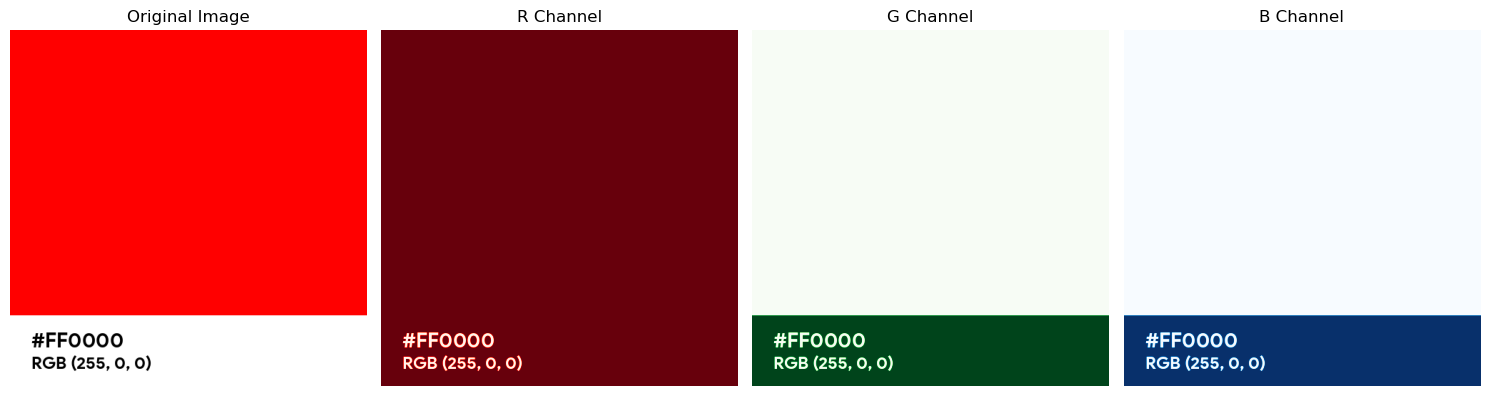

In [6]:
image_path = r"C:\Users\Ashima\Downloads\red.png"
rgb_split(image_path)

# Split into CMY Channels

In [4]:
def cmy_split(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    
    if image is None:
        print(f"Failed to load image from {image_path}")
    else:
        b, g, r= cv2.split(image)
        y = 255 - b
        m = 255 - g
        c = 255 - r
    
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(1, 4, 2)
        plt.imshow(c)
        plt.title('C Channel')
        plt.axis('off')
        
        plt.subplot(1, 4, 3)
        plt.imshow(m)
        plt.title('M Channel')
        plt.axis('off')
        
        plt.subplot(1, 4, 4)
        plt.imshow(y)
        plt.title('Y Channel')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

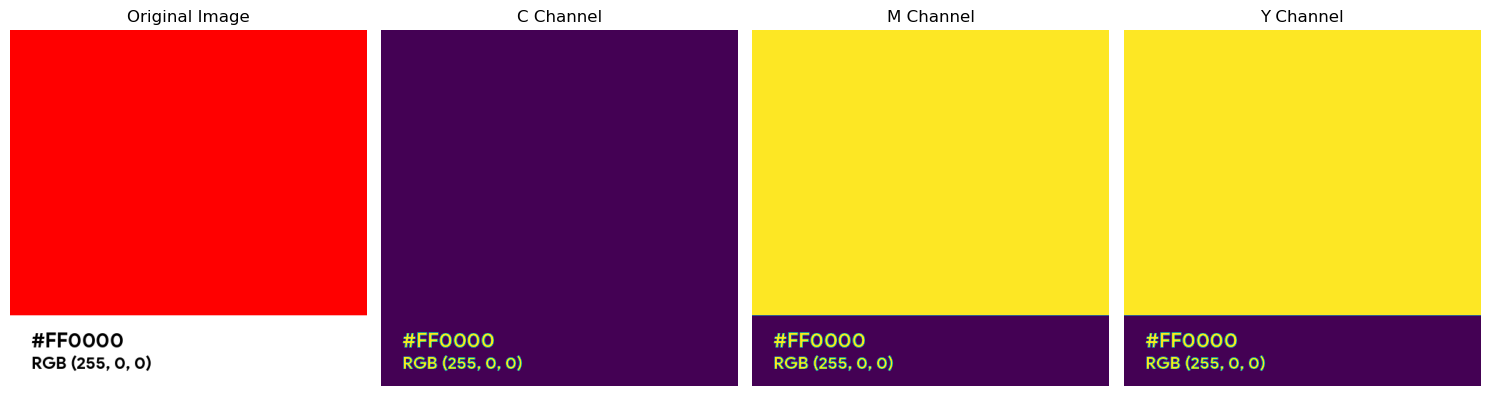

In [5]:
image_path = r"C:\Users\Ashima\Downloads\red.png"
cmy_split(image_path)

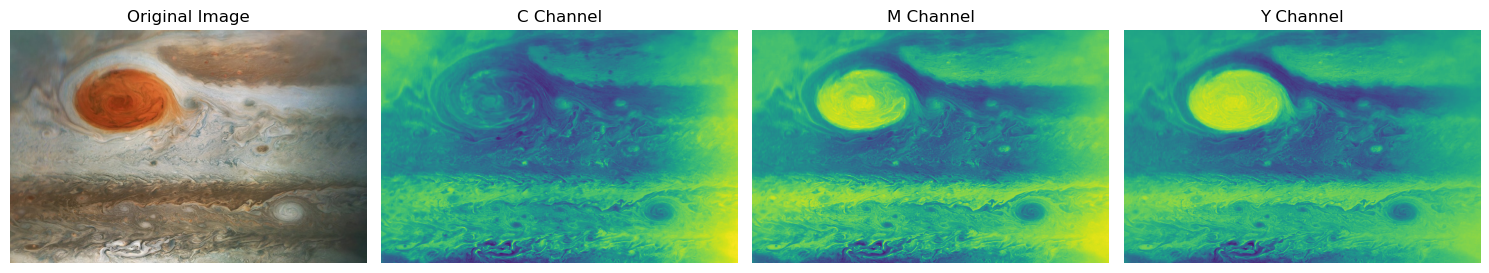

In [6]:
image_path = r"C:\Users\Ashima\Downloads\jupiter_red_spot.jpg"
cmy_split(image_path)

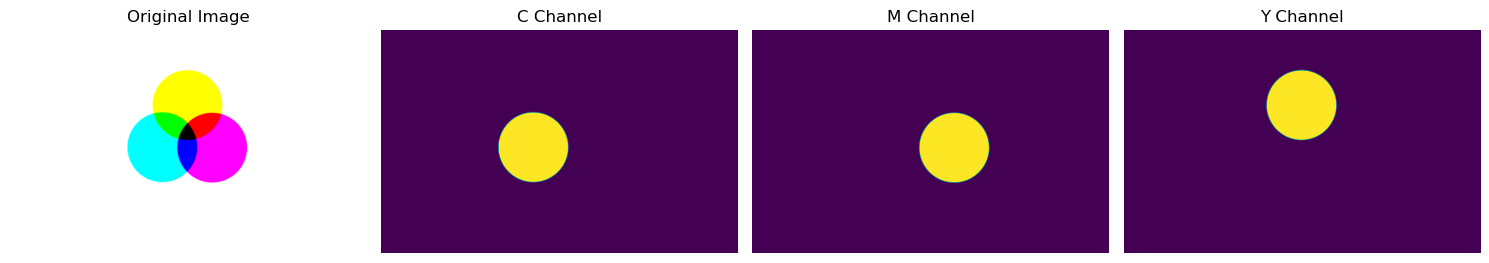

In [8]:
image_path = r"C:\Users\Ashima\Downloads\cmy.png"
cmy_split(image_path)

# Convert RGB to HSI

1. normalize
2. split into channels
3. compute HSI
4. display

In [26]:
def rgb_to_hsi(image_path):
    #if not os.path.exists(image_path):
    #    raise FileNotFoundError(f"The file at {image_path} does not exist.")

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)    
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    rgb_image = rgb_image / 255.0 #normalize
    
    R = rgb_image[:, :, 0]
    G = rgb_image[:, :, 1]
    B = rgb_image[:, :, 2]
    
    I = (R + G + B) / 3.0 #intensity is the sum of the color components of the image / 3 essentially
    
    min_RGB = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 * min_RGB / (R + G + B + 1e-10))  #saturation indicates how much a color is diluted with white. Higher = more vivid and pure i.e. less white
    
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    denominator = np.maximum(denominator, 1e-10)  # To avoid division by zero
    theta = np.arccos(numerator / denominator)
    
    H = theta
    H[B > G] = 2 * np.pi - H[B > G] #H[B > G] accesses hue values where B > G
    H = H / (2 * np.pi)  # Normalize hue to range [0, 1]
    
    # Stack H, S, I into a single image
    hsi_image = np.stack([H, S, I], axis=-1) #np.stack(arrays, axis) ; axis = -1 add one new dimention, here for 3 channels

    fig, axes = plt.subplots(1, 4, figsize=(10, 6))

    axes[0].imshow(rgb_image)
    axes[0].set_title('Original RGB Image')
    axes[0].axis('off')

    axes[1].imshow(hsi_image[:, :, 0], cmap='hsv')  # Display Hue channel using HSV colormap
    axes[1].set_title('HSI - Hue Channel')
    axes[1].axis('off')

    axes[2].imshow(hsi_image[:, :, 1], cmap='gray')  # Display Saturation channel as grayscale
    axes[2].set_title('HSI - Saturation Channel')
    axes[2].axis('off')

    axes[3].imshow(hsi_image[:, :, 2], cmap='gray')  # Display Intensity channel as grayscale
    axes[3].set_title('HSI - Intensity Channel')
    axes[3].axis('off')

    plt.show()

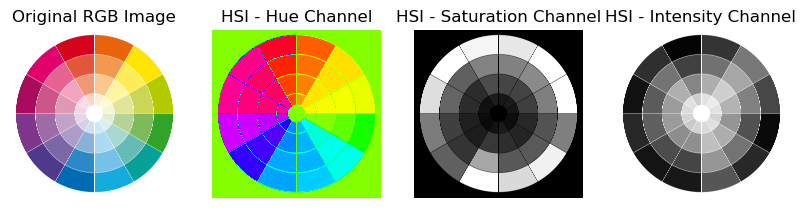

In [27]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\colour-wheel-1935401024.jpg"
rgb_to_hsi(image_path)

## Convert HSI to RGB

In [28]:
def hsi_to_rgb(H, S, I):
    """
    Parameters are all values in range [0, 1]
    H : 0 to 2pi
    S: 0 (grey) to 1 (full color)
    I : 0 (black) to 1 (full color)
    Returns: RGB image with shape (height, width, 3)
    """
    # Convert Hue from [0, 1] to [0, 2π]
    H = H * 2 * np.pi
    
    # Initialize RGB channels for the image
    R = np.zeros_like(H)
    G = np.zeros_like(H)
    B = np.zeros_like(H)
    
    # mask will be true for elements that fall within this range and false otherwise
    mask1 = (0 <= H) & (H < 2 * np.pi / 3)
    mask2 = (2 * np.pi / 3 <= H) & (H < 4 * np.pi / 3)
    mask3 = (4 * np.pi / 3 <= H) & (H < 2 * np.pi)

    #note differnce in formula to formula in theory
    
    # Range 1
    R[mask1] = I[mask1] * (1 + S[mask1] * np.cos(H[mask1]) / np.cos(np.pi / 3 - H[mask1]))
    G[mask1] = I[mask1] * (1 - S[mask1])
    B[mask1] = 3 * I[mask1] - (R[mask1] + G[mask1])
    
    # Range 2
    R[mask2] = I[mask2] * (1 - S[mask2])
    G[mask2] = I[mask2] * (1 + S[mask2] * np.cos(H[mask2] - 2 * np.pi / 3) / np.cos(np.pi / 3 - H[mask2] + 2 * np.pi / 3))
    B[mask2] = 3 * I[mask2] - (R[mask2] + G[mask2])
    
    # Range 3
    R[mask3] = I[mask3] * (1 - S[mask3])
    G[mask3] = I[mask3] * (1 - S[mask3] * np.cos(H[mask3] - 4 * np.pi / 3) / np.cos(np.pi / 3 - H[mask3] + 4 * np.pi / 3))
    B[mask3] = 3 * I[mask3] - (R[mask3] + G[mask3])
    
    rgb_image = np.stack([R, G, B], axis=-1)
    
    # clip values between 0 and 1
    #intermediate calculations can lead to RGB values that exceed the standard range due to operations involving trigonometric functions or floating-point precision errors.
    rgb_image = np.clip(rgb_image, 0, 1)
    
    return rgb_image

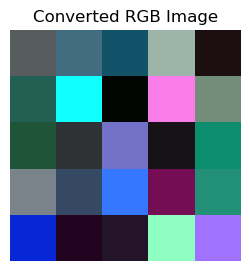

In [32]:
H = np.random.rand(5, 5) 
S = np.random.rand(5, 5) 
I = np.random.rand(5, 5) 

rgb_image = hsi_to_rgb(H, S, I)

plt.figure(figsize=(10, 3))
plt.imshow(rgb_image)
plt.title('Converted RGB Image')
plt.axis('off')  # Hide axes
plt.show()